
<h1 style="text-align:center; font-size:200%;">Titanic</h1>
<h2 style="text-align:center; font-size:100%;">Devoir individuel</h2>
<h4 style="text-align:left;">Réaliser par : Marouan Daghmoumi</h4>
<h4 style="text-align:left;">Encadré par : Pr. Sanae KHALI ISSA</h4>

### L'objectif de cette étude consiste à analyser le jeu de données du Titanic afin de créer un modèle de prédiction de la survie des passagers en fonction de leur âge, de leur sexe et de la classe de voyage sélectionnée.

## 1- Importation des bibliotheques

In [1]:
# pandas est une bibliothèque d'analyse de données 
import pandas as pd 
# matplotlib et seaborn sont des bibliothèques utilisées pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## 2- Importation de la base de données

In [2]:
data = pd.read_excel('Titanic.xls')

In [3]:
#visualisation de la base de données
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
#visualisation les 5 derniers ligne de la base de données
data.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [5]:
# Affichage la forma de base données (nombre de lignes, nombre de colonnes)
data.shape

(1309, 14)

In [6]:
#afficher descriptives pour chaque colonne de la base de données
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## 3- visualisation nombre de personnes vivantes selon leur sexe

Text(0, 0.5, 'Nombre de personnes vivantes')

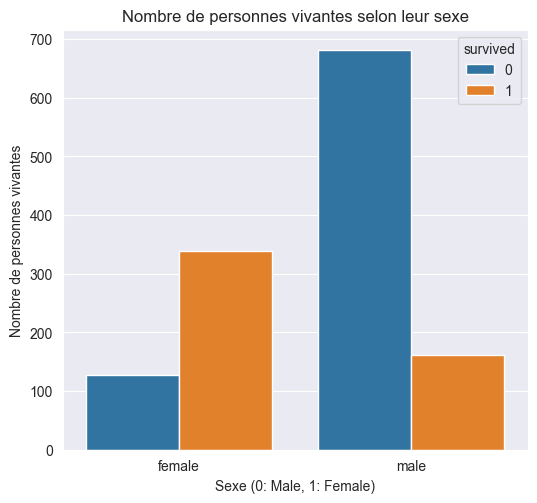

In [7]:
plt.figure(figsize = [6, 12])
plt.subplot(212)
sns.countplot(x='sex', hue = 'survived', data = data)
plt.title('Nombre de personnes vivantes selon leur sexe')
plt.xlabel('Sexe (0: Male, 1: Female)')
plt.ylabel('Nombre de personnes vivantes')

### on Remarque que la majorité des hommes n'ont pas pu survivre

## 4- Eliminer les colonnes : name, sibsp, parch, ticket, fare, cabin, embarked, boat, body et home.dest

In [8]:
# Création d'une liste contenant les noms des colonnes à éliminer
drop=['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest']

In [9]:
#supprimer les colonnes existe dans la liste
data.drop(columns=drop, axis=1, inplace=True)

In [10]:
data

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


## 5- Traitement des données manquantes.

<Axes: >

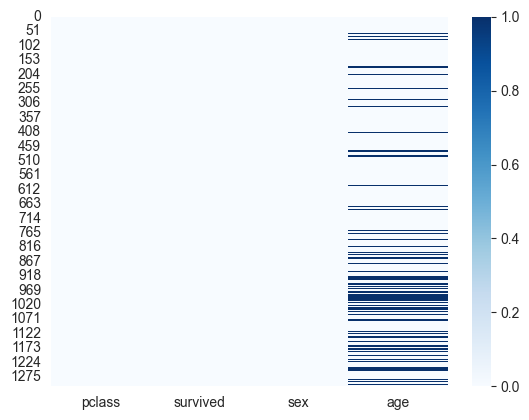

In [11]:
# Utilisation de heatmap pour visualiser les valeurs .
# Les cases bleues représentent les valeurs manquantes (True), tandis que les cases blanches représentent les valeurs présentes (False).
sns.heatmap(data.isnull(), cmap='Blues')

<Axes: xlabel='sex', ylabel='age'>

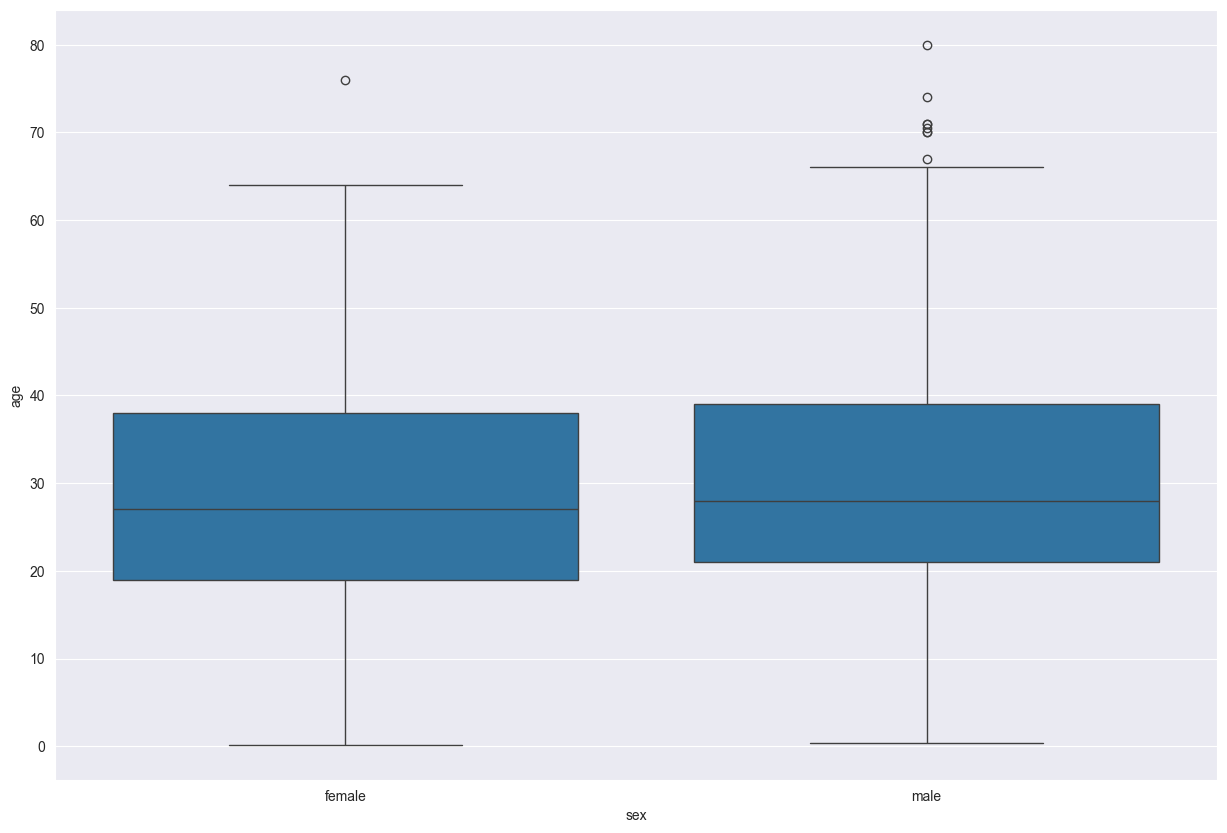

In [12]:
# moyenne de l'âge pour les femmes et les hommes 
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'sex', y = 'age', data = data)

In [13]:
# fonction remplaçant l'âge par les moyennes d'âge des hommes et des femmes 
def Fill_Age(row):
    age = row['age']
    sex = row['sex']
    
    if pd.isnull(age):
        if sex == 'male':
            return 29  # moyenne d'âge des hommes 
        else:
            return 25  # moyenne d'âge des femmes 
    else:
        return age


In [14]:
# Assuming 'sex' column has been mapped to 0 and 1
data['age'] = data.apply(Fill_Age, axis=1)

<Axes: >

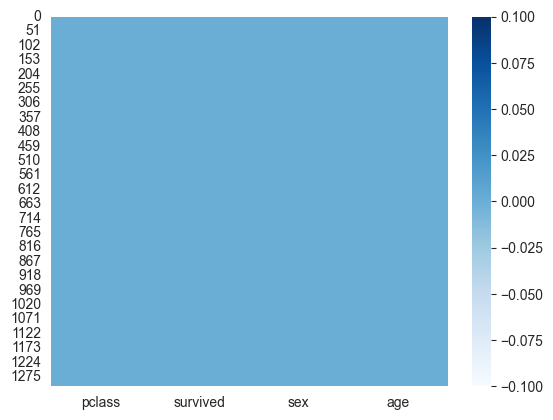

In [15]:
sns.heatmap(data.isnull(), cmap='Blues')

### Maintenant, il n'y a plus de valeurs manquantes 

## 6- Remplacer la valeur male par 0 et female par 1

In [16]:
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

In [17]:
data

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000
...,...,...,...,...
1304,3,0,1,14.5000
1305,3,0,1,25.0000
1306,3,0,0,26.5000
1307,3,0,0,27.0000


## 7- Appliquer les modèles de base de Machine Learning 

In [18]:
X = data.drop('survived', axis = 1).values # inputs 
# drop Survived car c'est un output
y = data['survived'].values # output = Survived

In [19]:
X 

array([[ 1.    ,  1.    , 29.    ],
       [ 1.    ,  0.    ,  0.9167],
       [ 1.    ,  1.    ,  2.    ],
       ...,
       [ 3.    ,  0.    , 26.5   ],
       [ 3.    ,  0.    , 27.    ],
       [ 3.    ,  0.    , 29.    ]])

In [20]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 10)

### 6.1- Modele Regression Logistique

In [22]:
# importation du modèle (régression logistique)
from sklearn.linear_model import LogisticRegression
# LogisticRegression() est une extention du modèle
Classifier_LR = LogisticRegression()
# application de la régression logistique sur les données d'entrainement
Classifier_LR.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Faire des prédictions sur l'ensemble de test
predictions = Classifier_LR.predict(X_test)
# Décrire les résultats obtenus
# Évaluation des résultats
LR_accuracy = accuracy_score(y_test, predictions)

print(f"Précision du modèle : {LR_accuracy:.2f}")

Précision du modèle : 0.76


### 6.2- Modele SVM

In [24]:
# Importation du modèle SVM
from sklearn.svm import SVC

# Création de l'instance du modèle SVM
SVM_classifier = SVC()

# Entraînement du modèle SVM sur les données d'entraînement
SVM_classifier.fit(X_train, y_train)

SVC()

In [25]:
# Faire des prédictions sur l'ensemble de test
predictions = SVM_classifier.predict(X_test)

# Évaluation des résultats
SVM_accuracy = accuracy_score(y_test, predictions)

print(f"Précision du modèle : {SVM_accuracy:.2f}")

Précision du modèle : 0.64


### 6.3- Modele KNN

In [26]:
# Importation du modèle KNN
from sklearn.neighbors import KNeighborsClassifier

# Création de l'instance du modèle KNN avec k=5 (vous pouvez ajuster la valeur de k selon vos besoins)
KNN_classifier = KNeighborsClassifier(n_neighbors=8)

# Entraînement du modèle KNN sur les données d'entraînement
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [27]:
# Faire des prédictions sur l'ensemble de test
predictions = KNN_classifier.predict(X_test)

# Évaluation des résultats
KNN_accuracy = accuracy_score(y_test, predictions)

print(f"Précision du modèle : {KNN_accuracy:.2f}")

Précision du modèle : 0.74


### 6.4- Naive Bayes

In [28]:
# Importation du modèle Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Création de l'instance du modèle Naive Bayes
NB_classifier = GaussianNB()

# Entraînement du modèle Naive Bayes sur les données d'entraînement
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [29]:
# Faire des prédictions sur l'ensemble de test
predictions = NB_classifier.predict(X_test)

# Évaluation des résultats
NB_accuracy = accuracy_score(y_test, predictions)

print(f"Précision du modèle : {NB_accuracy:.2f}")


Précision du modèle : 0.76


### 6.5- Cart Decision Tree

In [30]:
# Importation du modèle Decision Tree (CART)
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Création de l'instance du modèle Decision Tree (CART)
DT_classifier = DecisionTreeClassifier()

# Entraînement du modèle Decision Tree (CART) sur les données d'entraînement
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

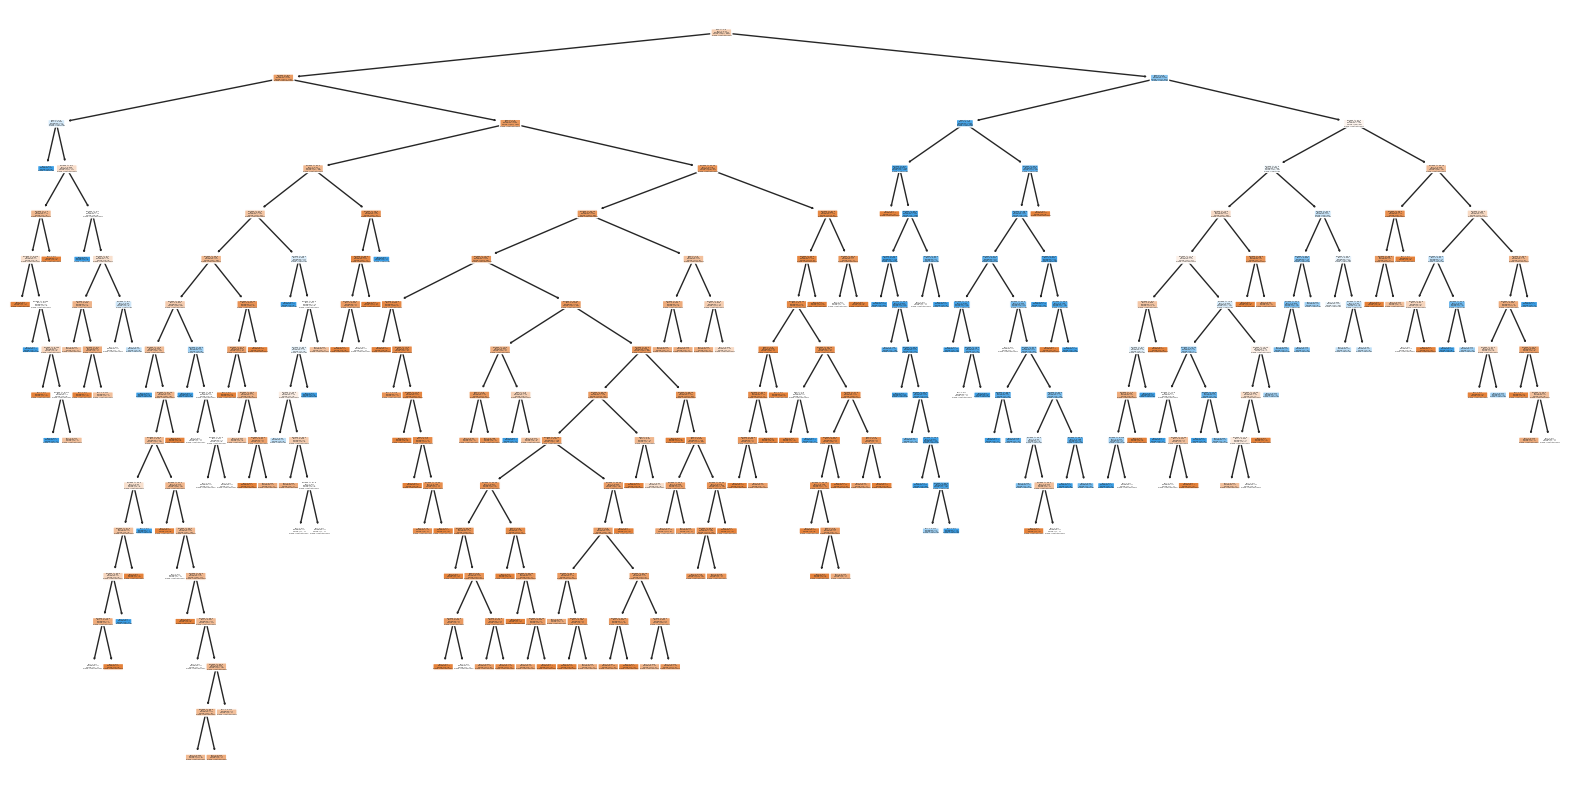

In [31]:
X_df = pd.DataFrame(X, columns=['age', 'sex', 'pclass'])
# Visualisation de l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(DT_classifier, filled=True, feature_names=X_df.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()

In [32]:
# Faire des prédictions sur l'ensemble de test
predictions = DT_classifier.predict(X_test)

# Évaluation des résultats
DT_accuracy = accuracy_score(y_test, predictions)

print(f"Précision du modèle : {DT_accuracy:.2f}")

Précision du modèle : 0.76


## 7- Resultat de chaque modeles 

In [33]:
model = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes',
                                   'K-Nearest Neighbour', 'Decision Tree', 'Support Vector Machine'],
                         'Accuracy': [LR_accuracy, NB_accuracy,
                                      KNN_accuracy, DT_accuracy, SVM_accuracy]})

In [34]:
model

,Model,Accuracy
0,Logistic Regression,0.759542
1,Naive Bayes,0.763359
2,K-Nearest Neighbour,0.736641
3,Decision Tree,0.759542
4,Support Vector Machine,0.641221


## 8- Conclusion Génerale

### Les différents modèles présentent des performances comparables dans la prédiction de la survie des passagers du Titanic. 
##### -Les modèles de régression logistique et Naive Bayes semblent donner de bonnes performances, avec des précisions similaires.
##### -Les modèles KNN et Decision Tree ont des performances compétitives mais légèrement inférieures.
##### -Le modèle SVM semble avoir des difficultés avec le jeu de données actuel, peut-être en raison de la complexité du problème ou de la nécessité d'ajuster les hyperparamètres.